In [58]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [59]:
# reading data frame 
mail_data=pd.read_csv("spam.csv",encoding='latin-1')

In [60]:
mail_data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [61]:
mail_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [62]:
# drop columns that has nan values , this columns is not important 
mail_data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [63]:
# rename columns of data
mail_data.columns=["cateory","mail"]

In [64]:
mail_data

,cateory,mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [65]:
# replace the null values to null string
mail_data1=mail_data.where((pd.notnull(mail_data))," ")

In [66]:
mail_data1.shape

(5572, 2)

In [67]:
# label encoding cateogry column
mail_data1.loc[:,"cateory"]=mail_data1["cateory"].map({"ham":1,"spam":0})

In [68]:
mail_data1["cateory"].unique()

array([1, 0], dtype=int64)

In [69]:
mail_data1["cateory"]=mail_data1["cateory"].astype(int)

In [70]:
mail_data1['cateory'].dtype

dtype('int32')

In [71]:
import matplotlib.pyplot as plt


In [72]:
spam_counts = mail_data1["cateory"].value_counts()


In [73]:
spam_counts.index

Int64Index([1, 0], dtype='int64')

In [74]:
spam_counts.values

array([4825,  747], dtype=int64)

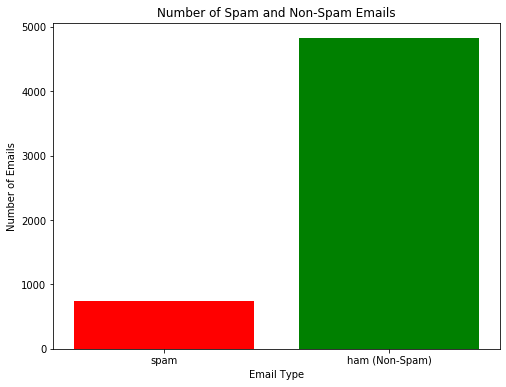

In [75]:
plt.figure(figsize=(8, 6))
plt.bar(spam_counts.index,spam_counts.values, color=['green', 'red'])
plt.xlabel('Email Type')
plt.ylabel('Number of Emails')
plt.title('Number of Spam and Non-Spam Emails')
plt.xticks([1, 0], ['ham (Non-Spam)', 'spam'])
plt.show()

In [76]:
# separate data to train and test
x=mail_data1['mail']
y=mail_data1["cateory"]
print(x)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: mail, Length: 5572, dtype: object


In [77]:
# splitting data to train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [78]:
# transform the text data to feature vectors
feature_extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase="True")

In [79]:
x_train_features=feature_extraction.fit_transform(x_train)

In [80]:
x_test_features=feature_extraction.transform(x_test)

In [81]:
print(x_train_features)

  (0, 741)	0.3219352588930141
  (0, 3979)	0.2410582143632299
  (0, 4296)	0.3891385935794867
  (0, 6599)	0.20296878731699391
  (0, 3386)	0.3219352588930141
  (0, 2122)	0.38613577623520473
  (0, 3136)	0.440116181574609
  (0, 3262)	0.25877035357606315
  (0, 3380)	0.21807195185332803
  (0, 4513)	0.2909649098524696
  (1, 4061)	0.380431198316959
  (1, 6872)	0.4306015894277422
  (1, 6417)	0.4769136859540388
  (1, 6442)	0.5652509076654626
  (1, 7443)	0.35056971070320353
  (2, 933)	0.4917598465723273
  (2, 2109)	0.42972812260098503
  (2, 3917)	0.40088501350982736
  (2, 2226)	0.413484525934624
  (2, 5825)	0.4917598465723273
  (3, 6140)	0.4903863168693604
  (3, 1599)	0.5927091854194291
  (3, 1842)	0.3708680641487708
  (3, 7453)	0.5202633571003087
  (4, 2531)	0.7419319091456392
  :	:
  (4452, 2122)	0.31002103760284144
  (4453, 999)	0.6760129013031282
  (4453, 7273)	0.5787739591782677
  (4453, 1762)	0.45610005640082985
  (4454, 3029)	0.42618909997886
  (4454, 2086)	0.3809693742808703
  (4454, 3088)

In [82]:
# training logistic model
LR=LogisticRegression()

In [83]:
LR.fit(x_train_features,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
# evaluation train model
prediction_train=LR.predict(x_train_features)

In [85]:
accuracy_train=accuracy_score(y_train,prediction_train)

In [86]:
print('accuracy for training data : ',accuracy_train)

accuracy for training data :  0.9661207089970832


In [87]:
# prediction on test model
prediction_test=LR.predict(x_test_features)

In [88]:
accuracy_test=accuracy_score(y_test,prediction_test)

In [89]:
print('accuracy for test data : ',accuracy_test)

accuracy for test data :  0.9623318385650225


In [90]:
### accuracy of logistic Regression is 96%

In [91]:
# we willtry naive bayes 
NB=MultinomialNB()

In [92]:
NB.fit(x_train_features,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [93]:
# evaluation train model
prediction_train=NB.predict(x_train_features)

In [94]:
accuracy_train=accuracy_score(y_train,prediction_train)

In [95]:
print('accuracy for training data : ',accuracy_train)

accuracy for training data :  0.9822750729190038


In [96]:
# prediction on test model
prediction_test=NB.predict(x_test_features)

In [97]:
accuracy_test=accuracy_score(y_test,prediction_test)

In [98]:
print('accuracy for test data : ',accuracy_test)

accuracy for test data :  0.9713004484304932


In [99]:
conf_matrix = confusion_matrix(y_test,prediction_test)
classification_rep = classification_report(y_test,prediction_test)

In [100]:
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Confusion Matrix:
[[123  32]
 [  0 960]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.79      0.88       155
           1       0.97      1.00      0.98       960

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



### WE find that module naive bayes give us more better accuracy than Logistic Regression ###